## European Sales Linear Regression Model
### Ebru Keleş - 2000488

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Explore and Preprocess Data

In [2]:
#Read the data
eu_sales_df = pd.read_csv("C:/Users/ebrukeles/Desktop/BDA5002/Exercises/Exercise 1/EuropeanSales.csv")

#Show first 10 rows of dataset
eu_sales_df.head(10)

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935
5,Finland,5.3,51.32,9.9,6.3,372,1971
6,France,61.9,44.51,10.0,5.7,96,5929
7,Germany,82.5,44.45,9.1,4.6,83,6824
8,Greece,11.2,31.67,9.9,3.9,73,813
9,Hungary,10.0,15.41,7.3,5.1,45,449


In [3]:
#General information about the dataset. 
#For example, there is information about the count of non-null data for a per column, and the data type of columns.
eu_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            21 non-null     object 
 1   Population         21 non-null     float64
 2   GDPperHead         21 non-null     float64
 3   UnemploymentRate   21 non-null     float64
 4   EducationSpending  21 non-null     float64
 5   SalesPerCapita     21 non-null     int64  
 6   ComputerSales      21 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


In [4]:
# Null value checking
eu_sales_df.isna().sum()

Country              0
Population           0
GDPperHead           0
UnemploymentRate     0
EducationSpending    0
SalesPerCapita       0
ComputerSales        0
dtype: int64

There is no null value in dataset.

## Data Visualization

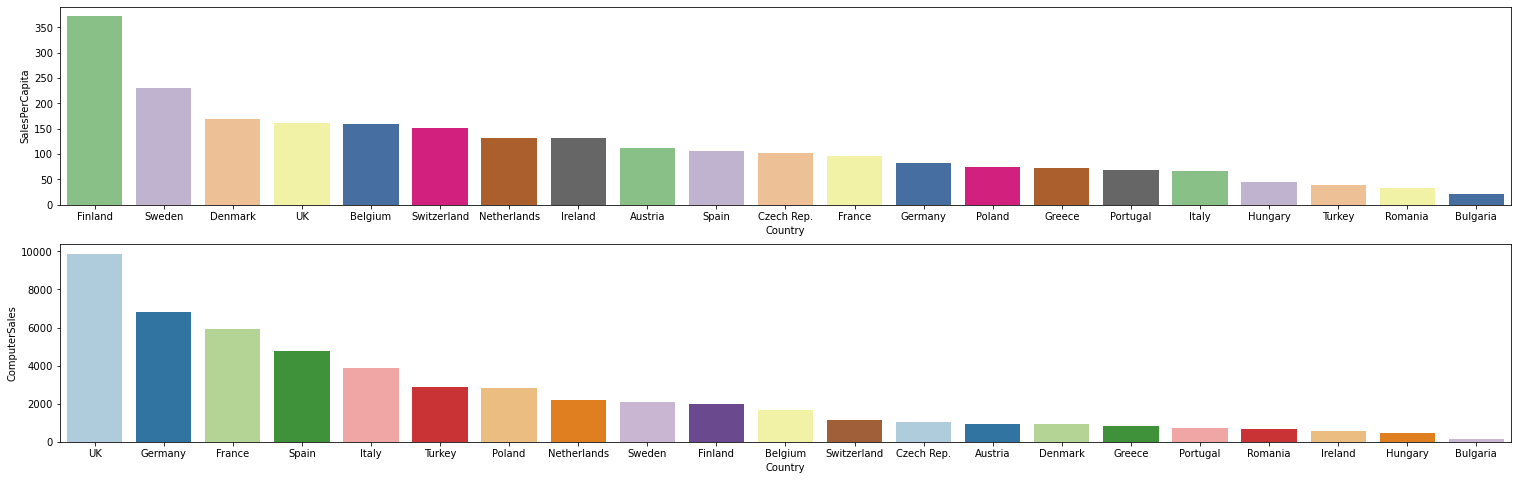

In [5]:
#Country is a categorical column. The bar charts below show the values of SalesPerCapita and ComputerSales of countries.

fig, ax = plt.subplots(2,1,figsize=(26,8))

sns.barplot(x='Country', y='SalesPerCapita', data=eu_sales_df.sort_values('SalesPerCapita', ascending = False), palette='Accent', ax=ax[0]);

sns.barplot(x='Country', y='ComputerSales', data=eu_sales_df.sort_values('ComputerSales', ascending = False), palette='Paired', ax=ax[1]);

<AxesSubplot:xlabel='SalesPerCapita', ylabel='EducationSpending'>

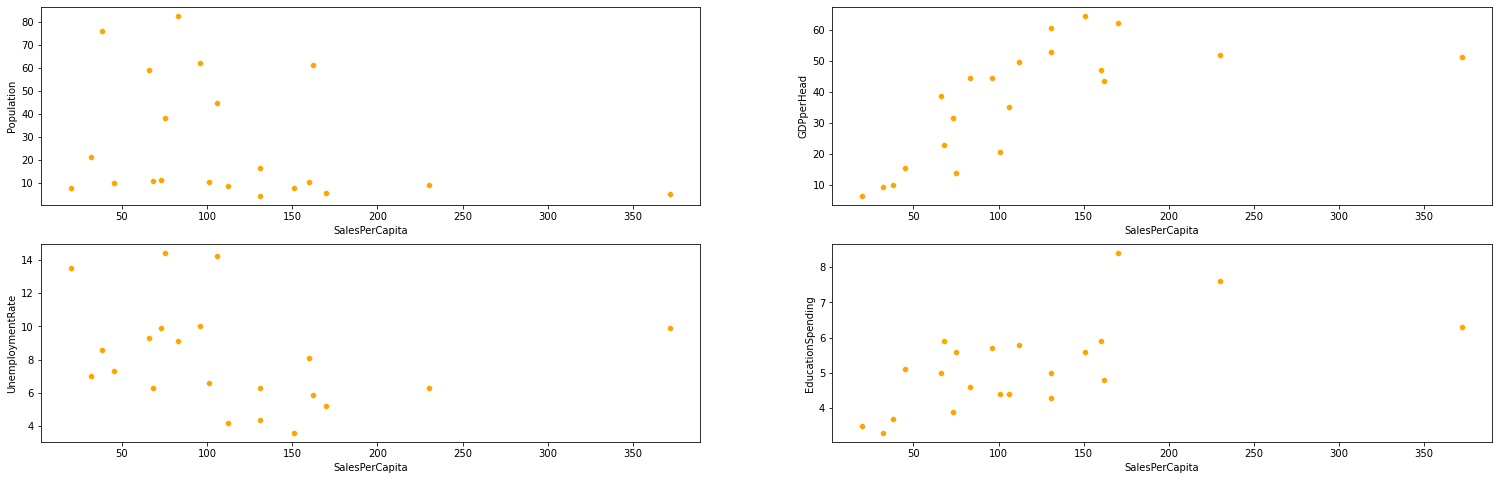

In [6]:
#The SalesPerCapita is one of the target variables.
#These graphs show the distribution of the target variable and other columns.
fig, ax = plt.subplots(2,2,figsize=(26,8))

sns.scatterplot(
    data=eu_sales_df,
    x="SalesPerCapita", y="Population", ax=ax[0,0], color='orange'
)

sns.scatterplot(
    data=eu_sales_df,
    x="SalesPerCapita", y="GDPperHead", ax=ax[0,1], color='orange'
)

sns.scatterplot(
    data=eu_sales_df,
    x="SalesPerCapita", y="UnemploymentRate", ax=ax[1,0], color='orange'
)

sns.scatterplot(
    data=eu_sales_df,
    x="SalesPerCapita", y="EducationSpending", ax=ax[1,1], color='orange'
)


<AxesSubplot:xlabel='ComputerSales', ylabel='EducationSpending'>

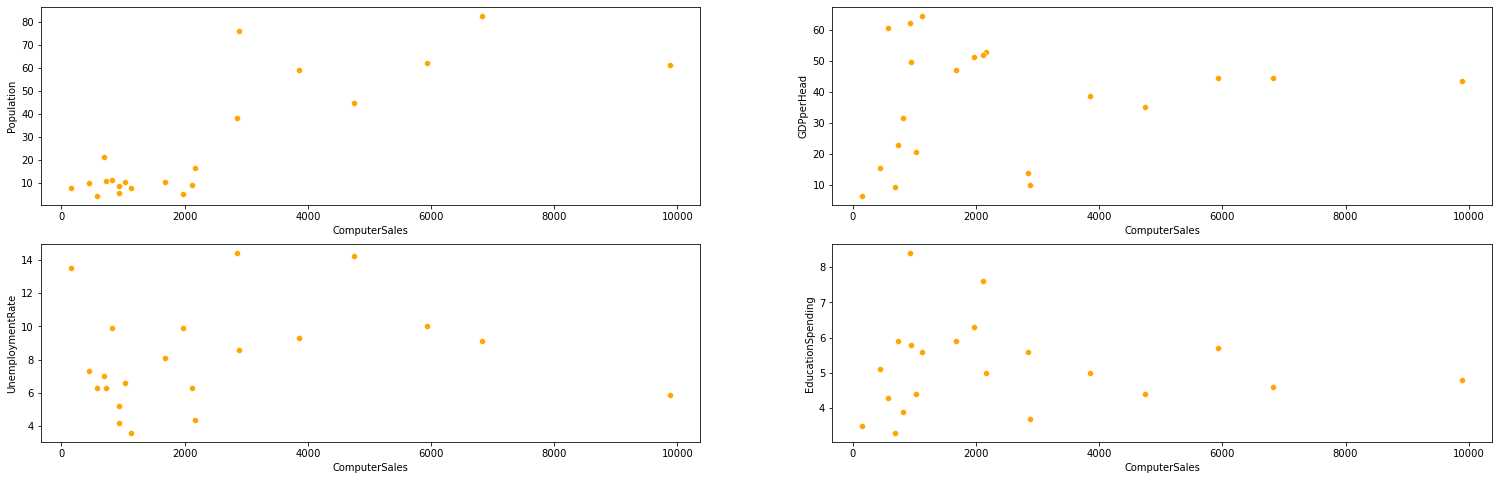

In [7]:
#The ComputerSales is one of the target variables.
#These graphs show the distribution of the target variable and other columns.
fig, ax = plt.subplots(2,2,figsize=(26,8))

sns.scatterplot(
    data=eu_sales_df,
    x="ComputerSales", y="Population", ax=ax[0,0], color='orange'
)

sns.scatterplot(
    data=eu_sales_df,
    x="ComputerSales", y="GDPperHead", ax=ax[0,1], color='orange'
)

sns.scatterplot(
    data=eu_sales_df,
    x="ComputerSales", y="UnemploymentRate", ax=ax[1,0], color='orange'
)

sns.scatterplot(
    data=eu_sales_df,
    x="ComputerSales", y="EducationSpending", ax=ax[1,1], color='orange'
)



C:\Users\ebrukeles\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ebrukeles\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ebrukeles\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

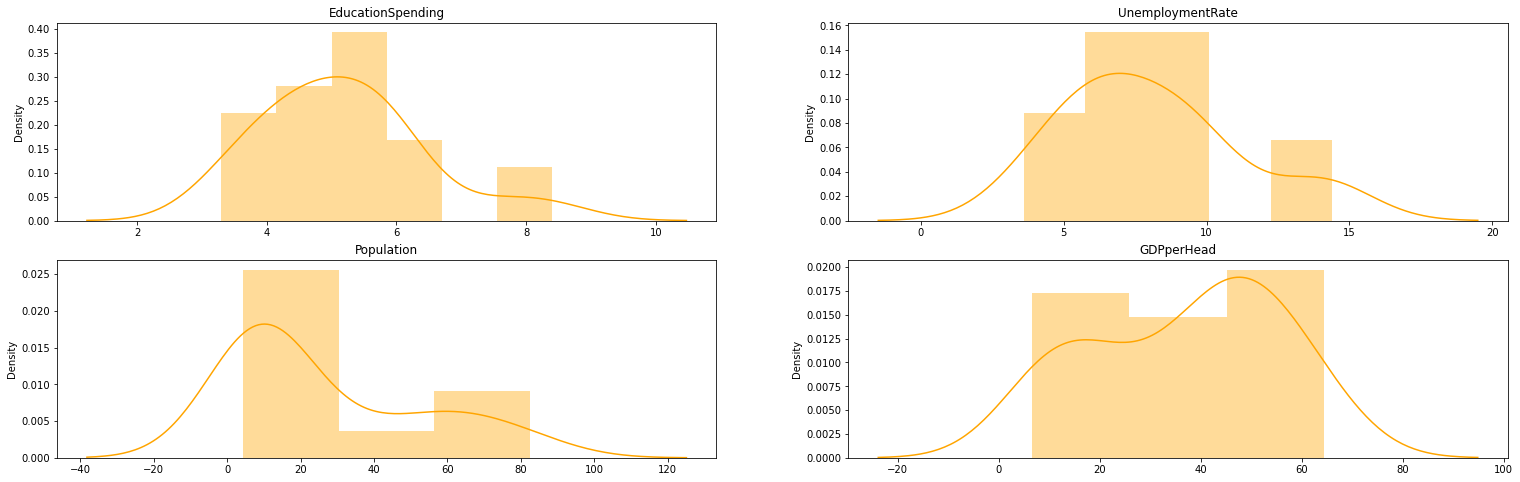

In [8]:
#distribution of columns which are not target variables
fig, ax = plt.subplots(2,2,figsize=(26,8))

sns.distplot(x=eu_sales_df["EducationSpending"], color='orange', ax=ax[0,0])
ax[0,0].set_title("EducationSpending", size = 12)
sns.distplot(x=eu_sales_df["UnemploymentRate"], color='orange', ax=ax[0,1])
ax[0,1].set_title("UnemploymentRate", size = 12)
sns.distplot(x=eu_sales_df["Population"], color='orange', ax=ax[1,0])
ax[1,0].set_title("Population", size = 12)
sns.distplot(x=eu_sales_df["GDPperHead"], color='orange', ax=ax[1,1])
ax[1,1].set_title("GDPperHead", size = 12)


plt.show()

## Outlier Data Handling 

In [9]:
#General statistical informations about variables
eu_sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,21.0,26.723810,26.128929,4.40,8.40,10.70,44.80,82.50
GDPperHead,21.0,36.973810,18.654496,6.55,20.67,43.54,51.32,64.43
UnemploymentRate,21.0,8.100000,3.122979,3.60,6.30,7.30,9.90,14.40
EducationSpending,21.0,5.180952,1.269889,3.30,4.40,5.00,5.80,8.40
SalesPerCapita,21.0,115.333333,78.970459,20.00,68.00,101.00,151.00,372.00
ComputerSales,21.0,2492.809524,2499.807965,154.00,813.00,1682.00,2879.00,9887.00


In [10]:
#Number of columns and rows before outlier data handling
eu_sales_df.shape

(21, 7)

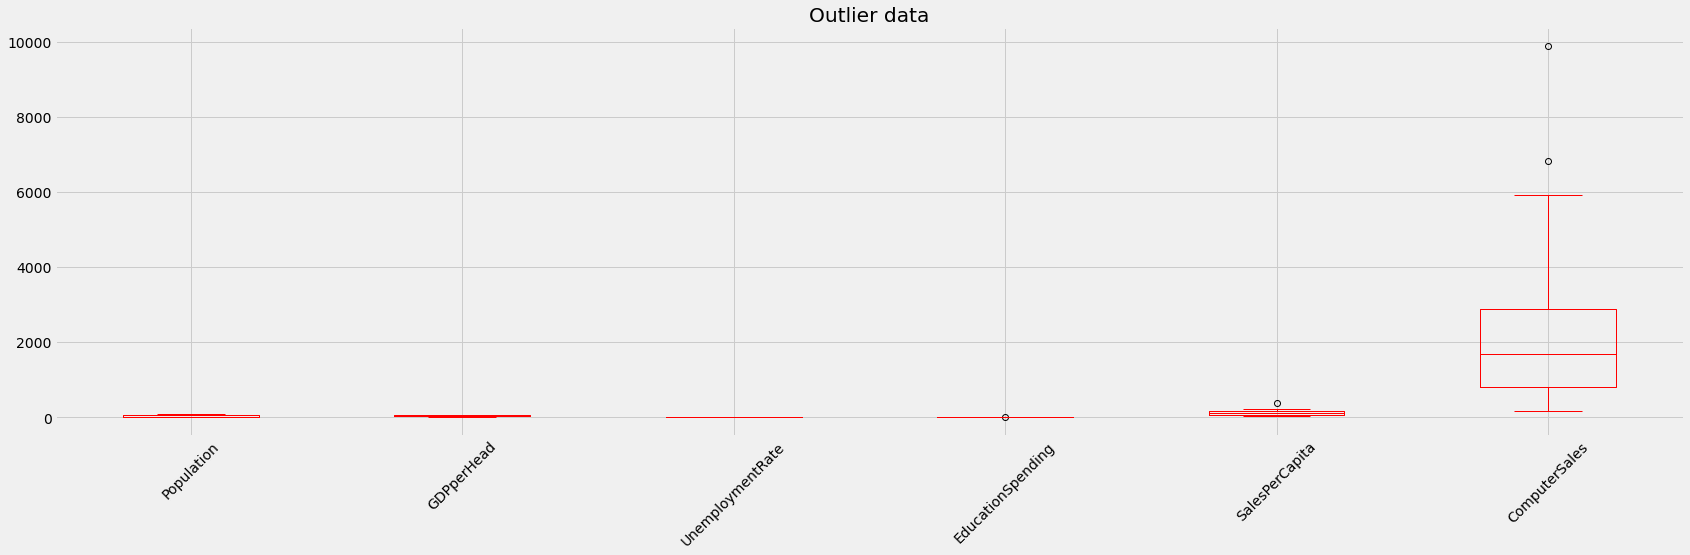

In [11]:
#This graph shows the min value, max value, lower quartile (Q1), upper quartile (Q3), median, 
#and IQR of variables as box and whisker.
plt.style.use('fivethirtyeight')
outlier= eu_sales_df.plot(kind='box',figsize=(26,7), color='red');
plt.xticks(rotation=45);
plt.title('Outlier data');

There are outlier data for ComputerSales, SalesPerCapita and EducationSpending columns.

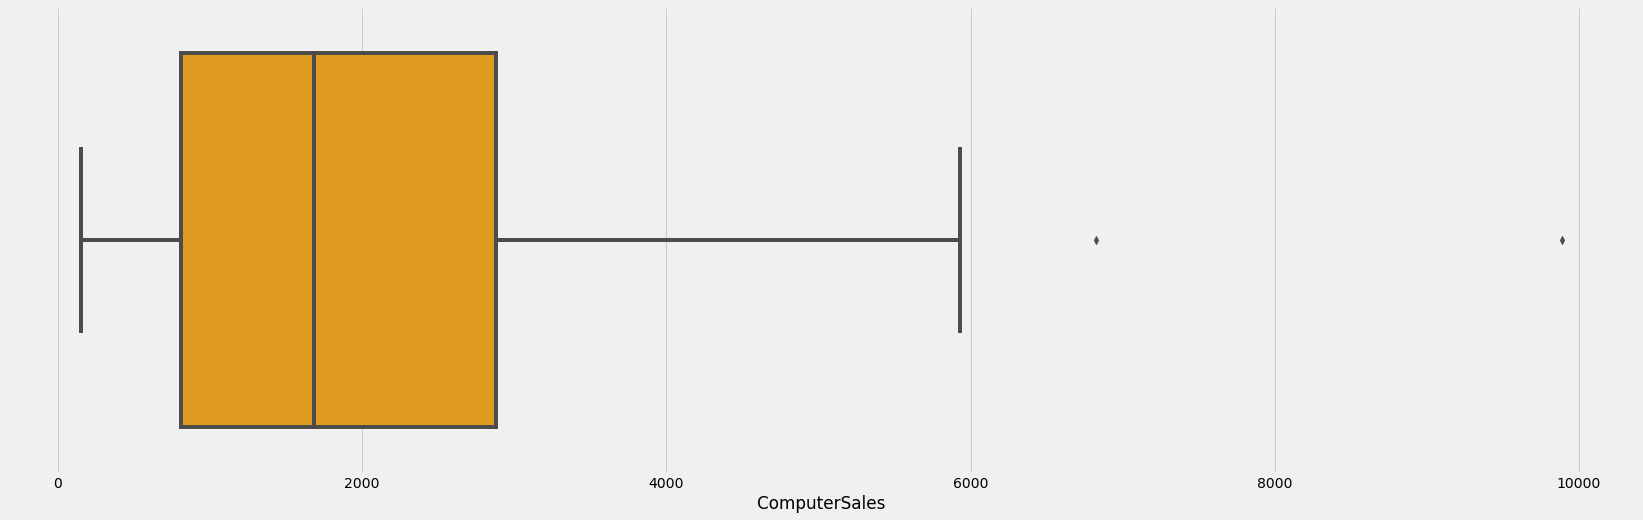

In [12]:
#Box plot before handle outlier data. 
fig, ax = plt.subplots(1,1,figsize=(26,8))
df_ComputerSales = eu_sales_df["ComputerSales"]
sns.boxplot(x=df_ComputerSales, color='orange');

In [13]:
Q1 = df_ComputerSales.quantile(0.25)
Q3 = df_ComputerSales.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 3*IQR
upper_limit = Q3 + 3*IQR
eu_sales_df = eu_sales_df[(eu_sales_df.ComputerSales > lower_limit) & (eu_sales_df.ComputerSales < (upper_limit))]

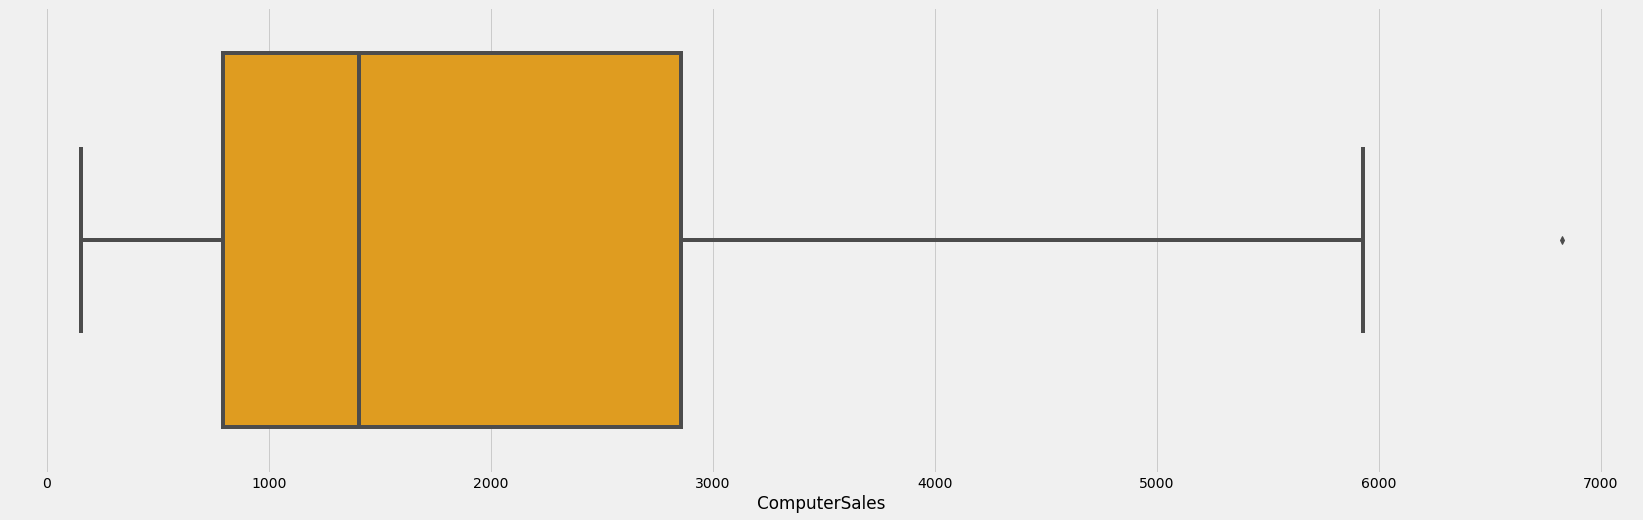

In [14]:
#Box plot after handle outlier data. 
fig, ax = plt.subplots(1,1,figsize=(26,8))
df_ComputerSales = eu_sales_df["ComputerSales"]
sns.boxplot(x=df_ComputerSales, color='orange');

In [15]:
eu_sales_df.shape
#One row is dropped.

(20, 7)

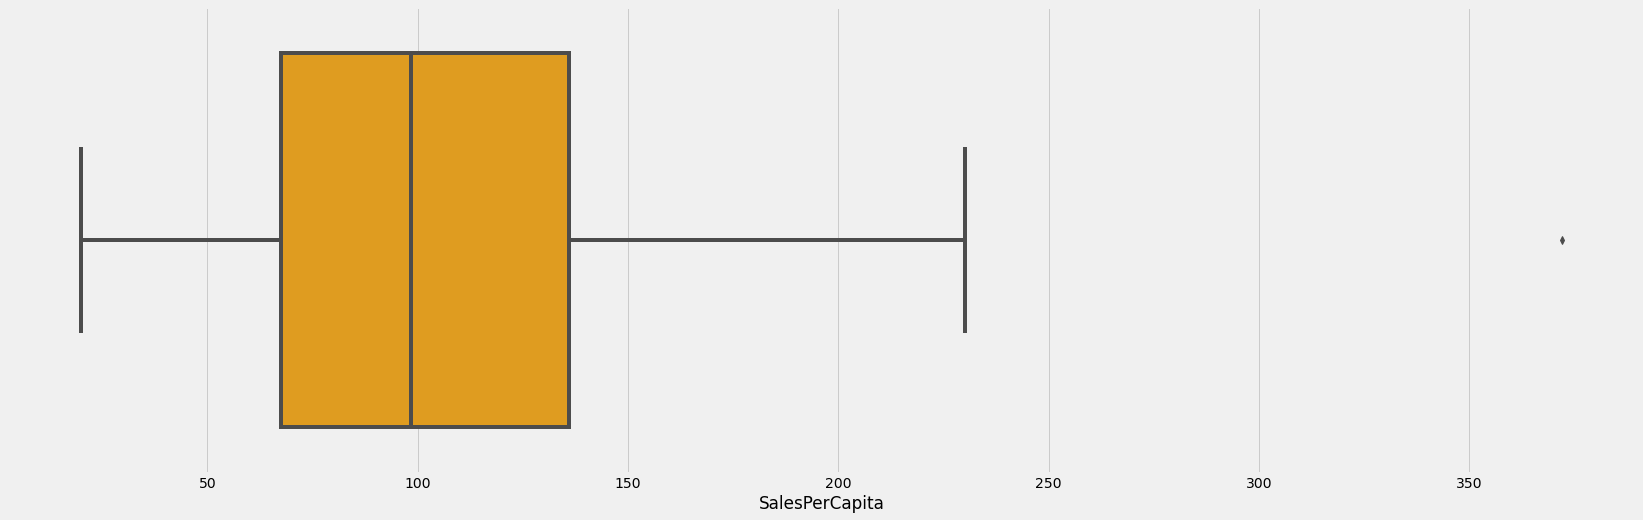

In [16]:
#Box plot before handle outlier data. 
fig, ax = plt.subplots(1,1,figsize=(26,8))
df_SalesPerCapita = eu_sales_df["SalesPerCapita"]
sns.boxplot(x=df_SalesPerCapita, color='orange');

In [17]:
Q1 = df_SalesPerCapita.quantile(0.25)
Q3 = df_SalesPerCapita.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
eu_sales_df = eu_sales_df[(eu_sales_df.SalesPerCapita > lower_limit) & (eu_sales_df.SalesPerCapita < (upper_limit))]

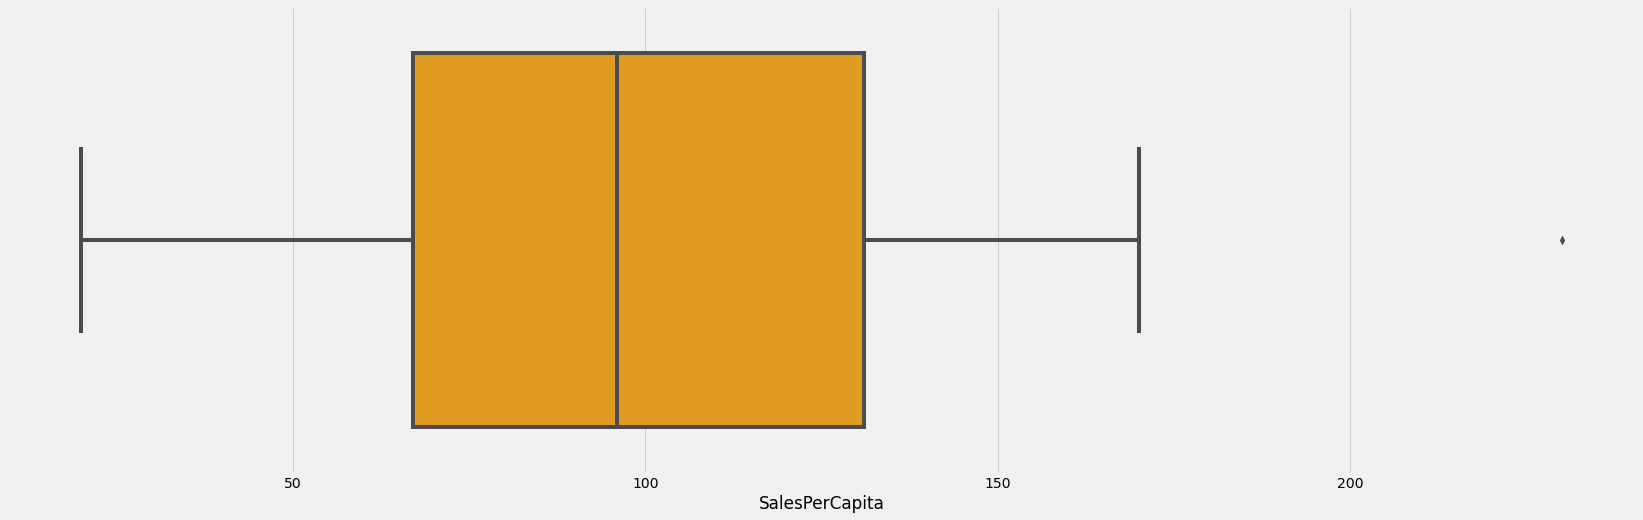

In [18]:
#Box plot after handle outlier data. 
fig, ax = plt.subplots(1,1,figsize=(26,8))
df_SalesPerCapita = eu_sales_df["SalesPerCapita"]
sns.boxplot(x=df_SalesPerCapita, color='orange');

In [19]:
eu_sales_df.shape
#One row is dropped.

(19, 7)

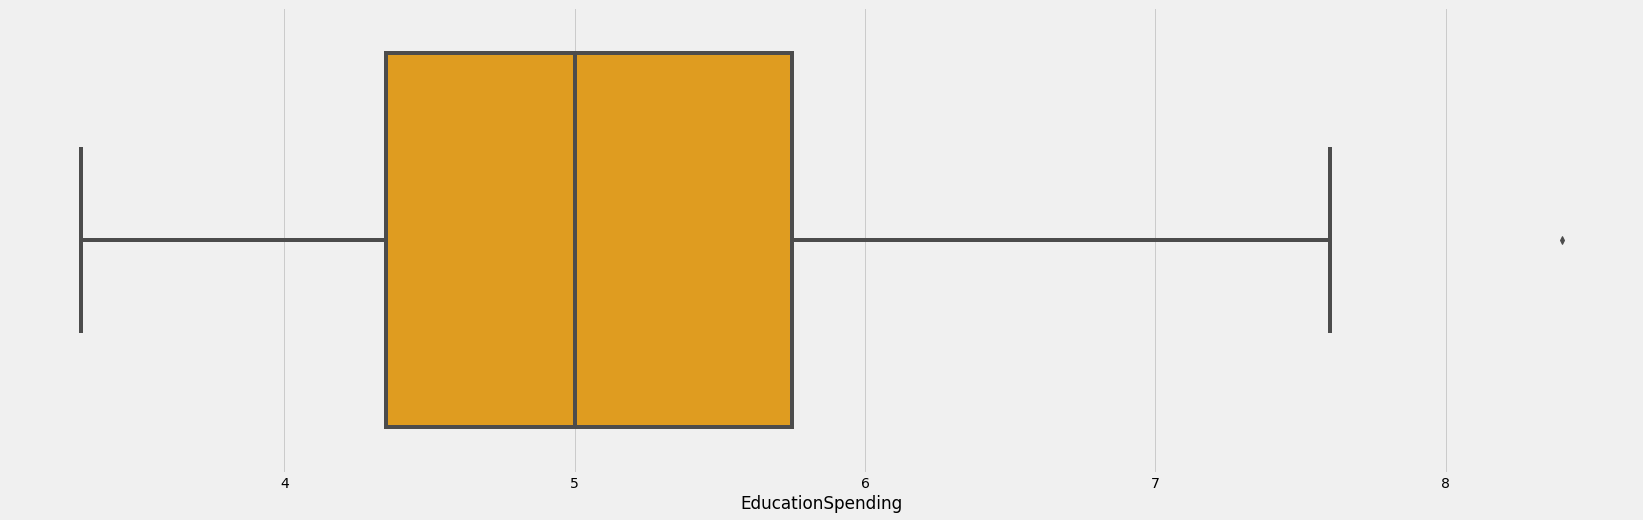

In [20]:
#Box plot before handle outlier data. 
fig, ax = plt.subplots(1,1,figsize=(26,8))
df_EducationSpending = eu_sales_df["EducationSpending"]
sns.boxplot(x=df_EducationSpending, color='orange');

In [21]:
Q1 = df_EducationSpending.quantile(0.25)
Q3 = df_EducationSpending.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
eu_sales_df = eu_sales_df[(eu_sales_df.EducationSpending > lower_limit) & (eu_sales_df.EducationSpending < (upper_limit))]

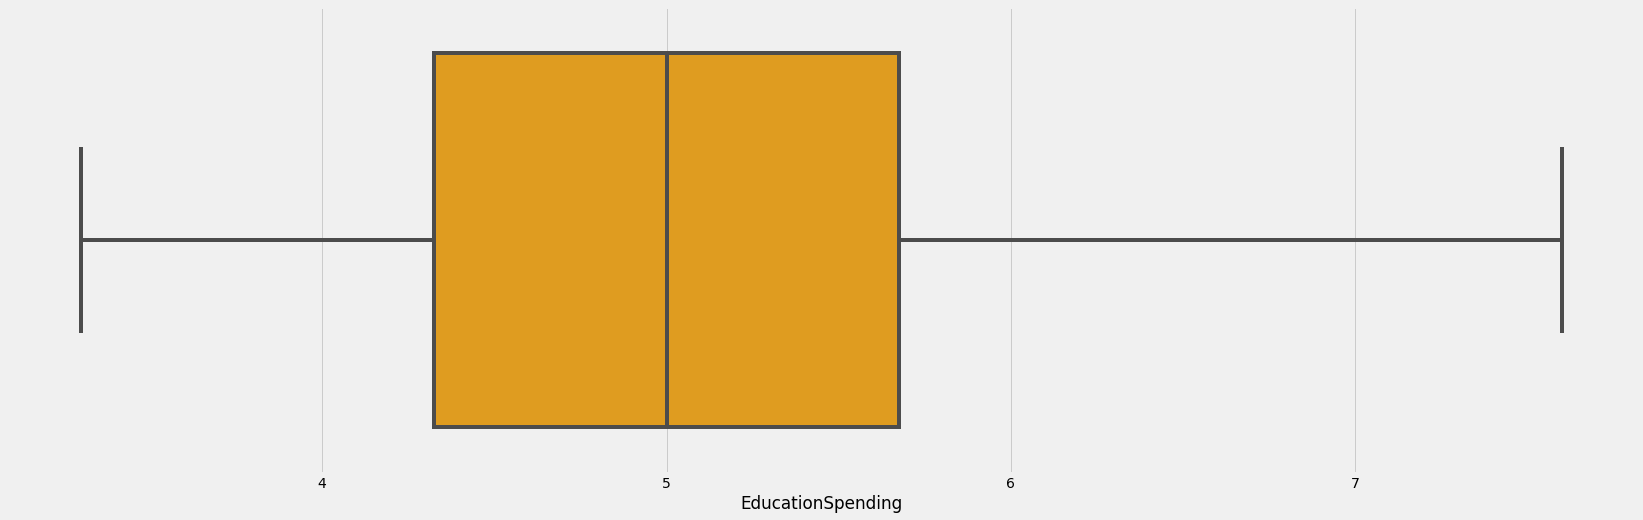

In [22]:
#Box plot after handle outlier data. 
fig, ax = plt.subplots(1,1,figsize=(26,8))
df_EducationSpending = eu_sales_df["EducationSpending"]
sns.boxplot(x=df_EducationSpending, color='orange');

In [23]:
eu_sales_df.shape
#One row is dropped.

(18, 7)

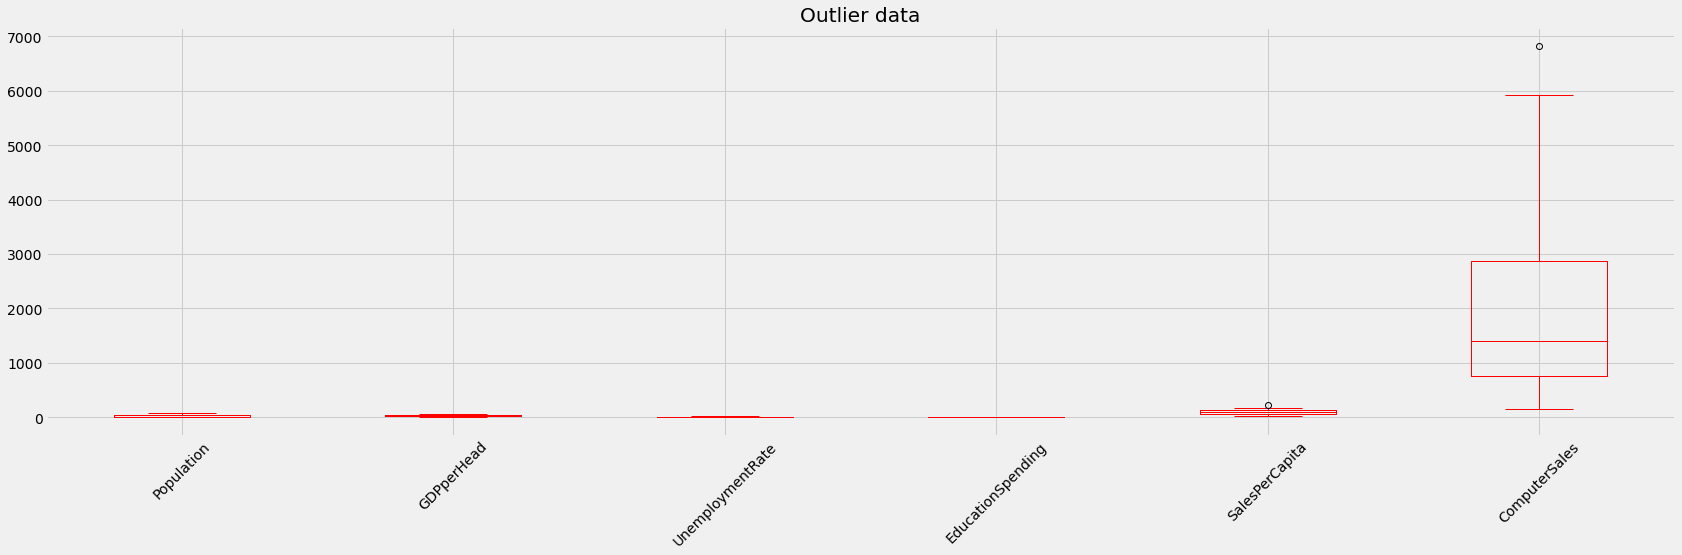

In [24]:
#After handle outlier data, this graph changes. The number of outlier/single data is decreased.
plt.style.use('fivethirtyeight')
outlier= eu_sales_df.plot(kind='box',figsize=(26,7), color='red');
plt.xticks(rotation=45);
plt.title('Outlier data');

In [25]:
#Number of columns and rows after outlier data handling
#Totally, 3 rows are dropped while handling outlier data
eu_sales_df.shape

(18, 7)

In [26]:
#Resetting index of data based on the row for columns which do not drop
eu_sales_df = eu_sales_df.reset_index(drop=True)

## Heat Map

In [27]:
#Country is a categorical column. And this column is unique for every row in this dataset.
#That's why the "Country" column is dropped.
eu_sales_df = eu_sales_df.drop(axis=1,columns="Country")

<AxesSubplot:>

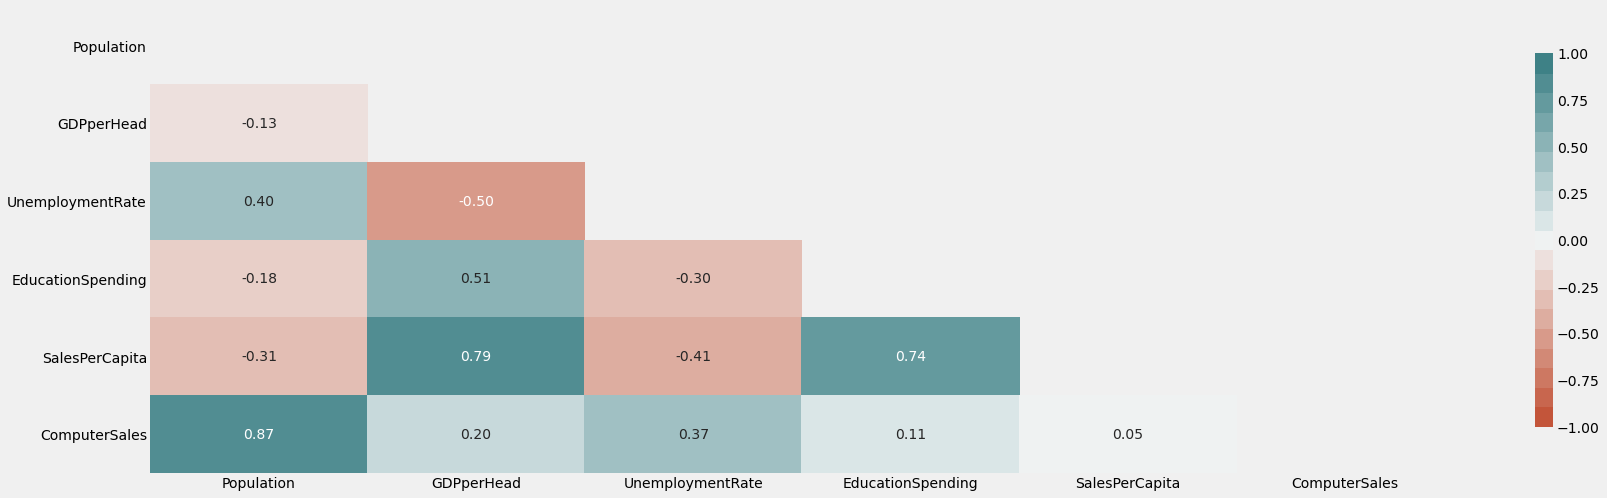

In [28]:
#The heat map shows the correlation value between each attribute.
eu_sales_df_corr = eu_sales_df.corr()
fig, ax = plt.subplots(figsize=(26, 8))
mask = np.triu(np.ones_like(eu_sales_df_corr, dtype=np.bool))
sns.heatmap(eu_sales_df_corr, mask = mask, annot = True, fmt = ".2f", cmap = sns.diverging_palette(1100, 200, n=19),
           vmin = -1, vmax = 1, cbar_kws = {"shrink": .8})

## Data Transformation

C:\Users\ebrukeles\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

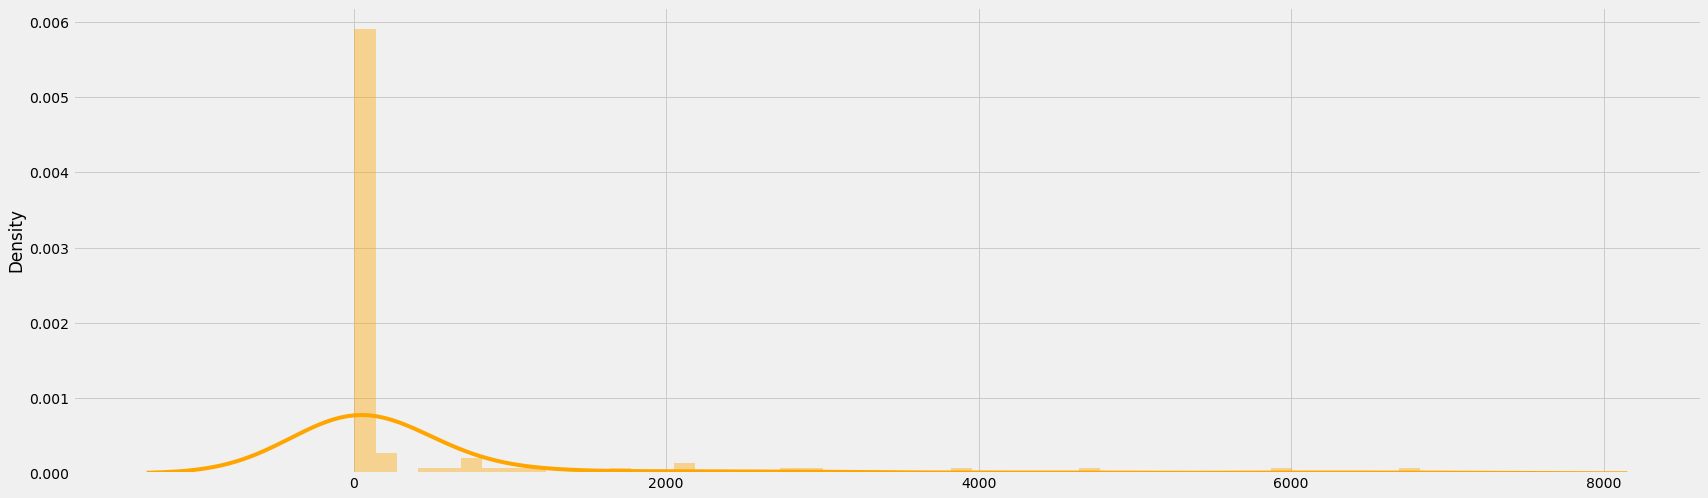

In [29]:
#In this grağh, the count of observations falling within each bin is shown using the height of the corresponding bar.
fig, ax = plt.subplots(1,1,figsize=(26,8))
sns.distplot(eu_sales_df, color='orange')

In [30]:
#Skewness provides normal distribution information on the horizontal plane.
eu_sales_df.skew()

Population           1.120392
GDPperHead          -0.077754
UnemploymentRate     0.641295
EducationSpending    0.531351
SalesPerCapita       0.877960
ComputerSales        1.213185
dtype: float64

In [31]:
#Log transformation is used to decrease the Skewness values.
eu_sales_df = eu_sales_df.apply(np.log)

C:\Users\ebrukeles\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

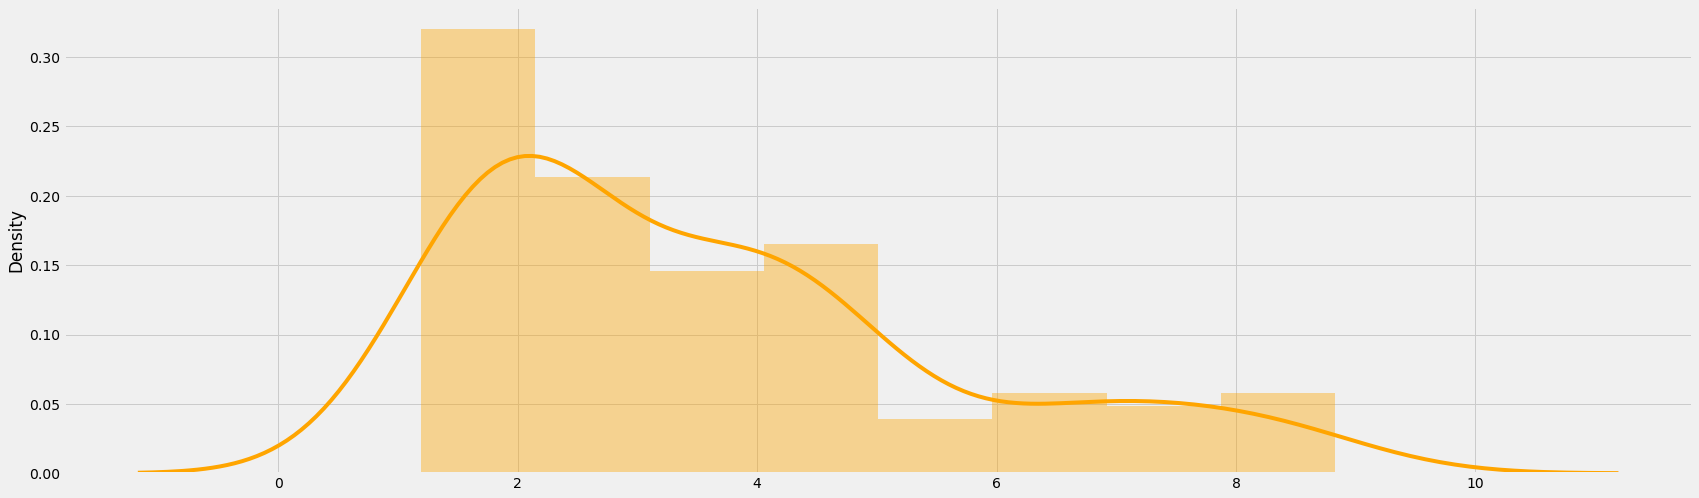

In [32]:
fig, ax = plt.subplots(1,1,figsize=(26,8))
sns.distplot(eu_sales_df, color='orange')

## Linear Regression for SalesPerCapita 

### Training and Test Sets: Splitting Data 

In [33]:
df_spc = eu_sales_df.copy()

In [34]:
#remove target variable from dataset
X =  df_spc.drop(['SalesPerCapita'], axis=1)
#add just target variable
y = df_spc["SalesPerCapita"]

In [35]:
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

In [36]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape
print("X_train shape = {}\nX_test shape = {}".format(X_train_shape, X_test_shape))

X_train shape = (14, 5)
X_test shape = (4, 5)


### Model

In [37]:
lm_spc = LinearRegression()
model_spc = lm_spc.fit(X_train, y_train)

In [38]:
Y_pred_train = model_spc.predict(X_train)
Y_pred_test = model_spc.predict(X_test)

In [39]:
r2_test = r2_score(y_test,Y_pred_test)
r2_train = r2_score(y_train,Y_pred_train)

In [40]:
adjusted_r_squared_test = 1 - (1-r2_test)*(df_spc.shape[0]-1)/(df_spc.shape[0]-X.shape[1]-1)
adjusted_r_squared_train = 1 - (1-r2_train)*(df_spc.shape[0]-1)/(df_spc.shape[0]-X.shape[1]-1)

In [41]:
mse_test = mean_squared_error(y_test,Y_pred_test)
mse_train = mean_squared_error(y_train,Y_pred_train)

In [42]:
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

In [43]:
print("Model Evaluation for SalesPerCapita")
print("Test results \nR-squared is ", r2_test)
print("Adjusted R-squared is ", adjusted_r_squared_test)
print("RSE is ", rmse_test)

print("\nTrain results \nR-squared is ", r2_train)
print("Adjusted R-squared is ", adjusted_r_squared_train)
print("RSE is ", rmse_train)

Model Evaluation for SalesPerCapita
Test results 
R-squared is  0.9995272653049018
Adjusted R-squared is  0.9993302925152775
RSE is  0.006384464760400824

Train results 
R-squared is  0.9999827779424981
Adjusted R-squared is  0.9999756020852056
RSE is  0.002576705132154976


In [44]:
X.columns, model_spc.coef_

(Index(['Population', 'GDPperHead', 'UnemploymentRate', 'EducationSpending',
        'ComputerSales'],
       dtype='object'),
 array([-9.97606943e-01,  7.46947720e-04, -3.54458104e-03,  8.68214731e-03,
         1.00117253e+00]))

## Linear Regression for ComputerSales

In [45]:
df_cs = eu_sales_df.copy()

In [46]:
#remove target variable from dataset
X =  df_cs.drop(['ComputerSales'], axis=1)
#add just target variable
y = df_cs["ComputerSales"]

In [47]:
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

In [48]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape
print("X_train shape = {}\nX_test shape = {}".format(X_train_shape, X_test_shape))

X_train shape = (14, 5)
X_test shape = (4, 5)


### Model

In [49]:
lm_cs = LinearRegression()
model_cs = lm_cs.fit(X_train, y_train)

In [50]:
Y_pred_test = model_cs.predict(X_test)
Y_pred_train = model_cs.predict(X_train)

In [51]:
r2_test = r2_score(y_test,Y_pred_test)
r2_train = r2_score(y_train,Y_pred_train)

In [52]:
adjusted_r_squared_test = 1 - (1-r2_test)*(df_cs.shape[0]-1)/(df_cs.shape[0]-X.shape[1]-1)
adjusted_r_squared_train = 1 - (1-r2_train)*(df_cs.shape[0]-1)/(df_cs.shape[0]-X.shape[1]-1)

In [53]:
mse_test = mean_squared_error(y_test,Y_pred_test)
mse_train = mean_squared_error(y_train,Y_pred_train)

In [54]:
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

In [55]:
print("Model Evaluation for ComputerSales")
print("Test results \nR-squared is ", r2_test)
print("Adjusted R-squared is ", adjusted_r_squared_test)
print("RSE is ", rmse_test)

print("\nTrain results \nR-squared is ", r2_train)
print("Adjusted R-squared is ", adjusted_r_squared_train)
print("RSE is ", rmse_train)

Model Evaluation for ComputerSales
Test results 
R-squared is  0.9998575762374627
Adjusted R-squared is  0.9997982330030722
RSE is  0.006379349693315521

Train results 
R-squared is  0.9999940347852939
Adjusted R-squared is  0.9999915492791663
RSE is  0.0025735533880232157


In [56]:
X.columns, model_cs.coef_

(Index(['Population', 'GDPperHead', 'UnemploymentRate', 'EducationSpending',
        'SalesPerCapita'],
       dtype='object'),
 array([ 9.96434234e-01, -6.85552542e-04,  3.54516322e-03, -8.57997330e-03,
         9.98724819e-01]))